In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import matplotlib.pyplot as plt
import numpy as np
import glob
import shutil
import time
from tensorflow.keras import layers

In [2]:
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [3]:
pwd

'C:\\Users\\ASUS\\Jupyter Files Python'

In [7]:
base_dir =os.path.join('C:\\Users\\ASUS\\Jupyter Files Python\\leaf')

In [8]:
classes = ['bay','coconut','jackfruit','mango','taro']

In [9]:
for c1 in classes:
  img_path = os.path.join(base_dir, c1)
  images = glob.glob(img_path + '/*.jpg') # import glob
  print(f"{c1} : {len(images)} images")
  train, val = images[:round(len(images)*0.8)], images[round(len(images)*0.8):]

  for t in train:
    if not os.path.exists(os.path.join(base_dir,'train', c1)):
      os.makedirs(os.path.join(base_dir, 'train', c1))
    shutil.move(t, os.path.join(base_dir, 'train', c1)) # import shutil

  for v in val:
    if not os.path.exists(os.path.join(base_dir, 'val', c1)):
      os.makedirs(os.path.join(base_dir, 'val', c1))
    shutil.move(v, os.path.join(base_dir, 'val', c1))

bay : 136 images
coconut : 120 images
jackfruit : 102 images
mango : 329 images
taro : 234 images


In [10]:
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')

In [32]:
BATCH_SIZE = 20
IMG_SHAPE = 100

In [33]:
def plotImages(images_arr):
  fig, axes = plt.subplots(1,5,figsize=(20,20))
  axes = axes.flatten()
  for img, ax in zip(images_arr, axes):
    ax.imshow(img)
  plt.tight_layout()
  plt.show()

In [34]:
image_gen = ImageDataGenerator(rescale=1./255)

train_data_gen = image_gen.flow_from_directory(batch_size = BATCH_SIZE,
                                               directory= train_dir,
                                               shuffle= True,
                                               target_size =(IMG_SHAPE,IMG_SHAPE))

Found 737 images belonging to 5 classes.


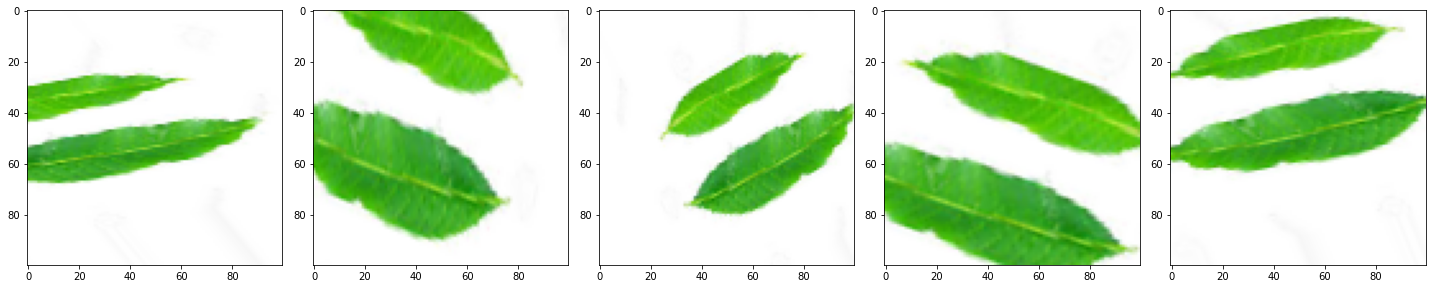

In [49]:
augmented_data =[train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_data)

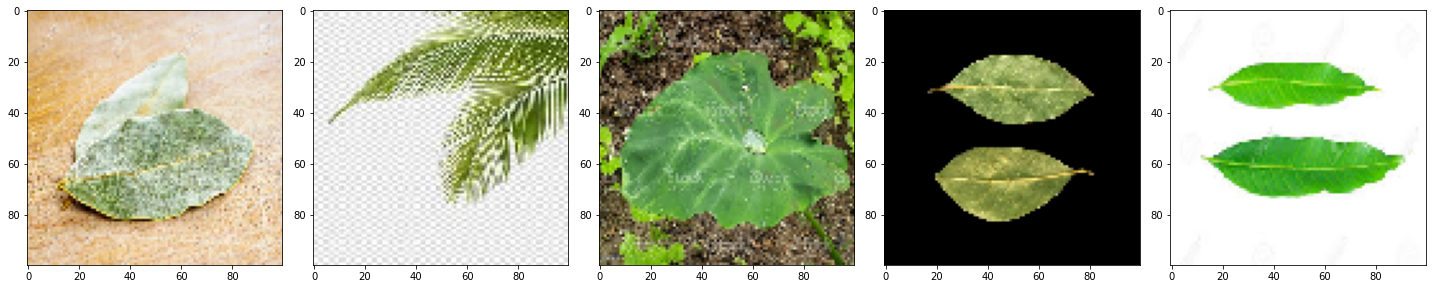

In [36]:
sample_training_images, _=next(train_data_gen)
plotImages(sample_training_images[:5])

In [37]:
train_image_generator= ImageDataGenerator(rescale=1./255,
                                          rotation_range=45,
                                          width_shift_range=.15,
                                          height_shift_range=.15,
                                          horizontal_flip=True,
                                          zoom_range=0.5
                                          )

validation_image_generator = ImageDataGenerator(rescale=1./255)

In [38]:
train_data_gen =train_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                          directory= train_dir,
                                                          shuffle= True,
                                                          target_size =(IMG_SHAPE,IMG_SHAPE),
                                                          class_mode='sparse')


Found 737 images belonging to 5 classes.


In [39]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                             directory= val_dir,
                                                             shuffle= False,
                                                             target_size= (IMG_SHAPE,IMG_SHAPE),
                                                             class_mode='sparse')

Found 184 images belonging to 5 classes.


In [44]:
model = tf.keras.Sequential([
                             tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape= (IMG_SHAPE,IMG_SHAPE,3)),
                             tf.keras.layers.MaxPooling2D(2,2),

                             tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                             tf.keras.layers.MaxPooling2D(2,2),
                             
                             tf.keras.layers.Conv2D(128,(3,3), activation='relu'),
                             tf.keras.layers.MaxPooling2D(2,2),

                             tf.keras.layers.Conv2D(128,(3,3), activation='relu'),
                             tf.keras.layers.MaxPooling2D(2,2),

                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dropout(0.2),
                             tf.keras.layers.Dense(512, activation='relu'),

                             tf.keras.layers.Dropout(0.2),
                             tf.keras.layers.Dense(5)
])

In [45]:
model.compile(optimizer='adam', 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [46]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 47, 47, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 21, 21, 128)       73856     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 10, 10, 128)       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 8, 8, 128)        

In [47]:
EPOCHS = 15
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch = int(np.ceil(train_data_gen.n/float(BATCH_SIZE))),
    epochs = EPOCHS,
    validation_data = val_data_gen,
    validation_steps = int(np.ceil(val_data_gen.n/float(BATCH_SIZE)))
)


Epoch 1/15
37/37 [==============================] - 24s 642ms/step - loss: 1.4441 - accuracy: 0.3921 - val_loss: 1.4133 - val_accuracy: 0.3587
Epoch 2/15
37/37 [==============================] - 15s 405ms/step - loss: 1.3753 - accuracy: 0.4043 - val_loss: 1.1612 - val_accuracy: 0.4837
Epoch 3/15
37/37 [==============================] - 16s 429ms/step - loss: 1.2440 - accuracy: 0.4858 - val_loss: 1.1264 - val_accuracy: 0.5435
Epoch 4/15
37/37 [==============================] - 15s 409ms/step - loss: 1.1913 - accuracy: 0.5563 - val_loss: 1.1038 - val_accuracy: 0.5054
Epoch 5/15
37/37 [==============================] - 16s 428ms/step - loss: 1.1484 - accuracy: 0.5536 - val_loss: 0.9486 - val_accuracy: 0.5815
Epoch 6/15
37/37 [==============================] - 17s 454ms/step - loss: 1.1024 - accuracy: 0.5767 - val_loss: 0.9165 - val_accuracy: 0.6304
Epoch 7/15
37/37 [==============================] - 16s 446ms/step - loss: 1.0483 - accuracy: 0.5875 - val_loss: 0.8983 - val_accuracy: 0.6685

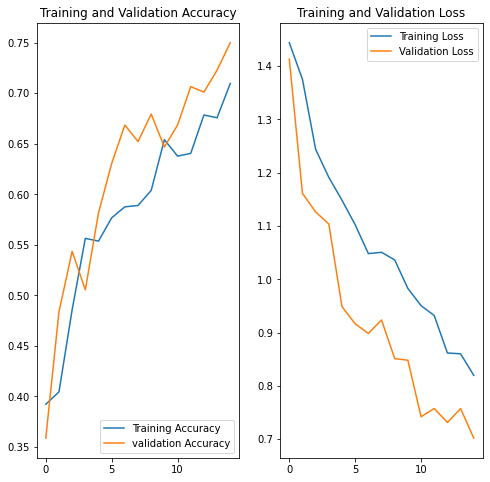

In [48]:
# visualizing result
# variables
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss =history.history['val_loss']

epochs_range = range(EPOCHS)

# plotting accuracy
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='validation Accuracy')
plt.legend(loc='lower right') # legend is used to indicate the location of text in graph
plt.title('Training and Validation Accuracy')

# plotting loss
plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label ='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig('./foo.png')
plt.show()

In [50]:
#saving the model
export_path_keras ="./leaves_v6_saved.h5"
print(export_path_keras)
model.save(export_path_keras)

./leaves_v6_saved.h5


NameError: name 'lena' is not defined